In [1]:
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
from upstox_client.rest import ApiException
import upstox_client
from data_fetching import get_instrument_key
from data_fetching import market_quote_ltp
from data_fetching import get_lot_size
from data_fetching import hist_data
import time
from datetime import datetime
import pandas as pd

In [2]:
path = os.path.abspath("acess_token.env")
load_dotenv(path)

access_token = os.getenv("ACCESS_TOKEN")
if not access_token:
    raise ValueError("ACCESS_TOKEN environment variable is not set.")


In [3]:
df = pd.read_json(r"https://assets.upstox.com/market-quote/instruments/exchange/NSE.json.gz")
df = df[df["segment"] == "NSE_INDEX"]
df = df[df["name"] == "Nifty 50"]
index_key = df["instrument_key"].values[0]
index_key

'NSE_INDEX|Nifty 50'

In [4]:
index_data = hist_data(index_key , "days" , "1" , "2025-09-18" , "2020-01-01")
index_data.index = index_data.index.tz_convert(None).normalize()
index_data.drop(columns=["Volume" , "OpenIntrest"] , inplace= True)


In [5]:
index_data["log_ret"] = np.log(index_data["Close"]/index_data["Close"].shift(1))
index_data.dropna(inplace=True)
index_data

,Open,High,Low,Close,log_ret
TimeStamp,,,,,
2020-01-01,12198.55,12289.90,12195.25,12282.20,0.008151
2020-01-02,12261.10,12265.60,12191.35,12226.65,-0.004533
2020-01-05,12170.60,12179.10,11974.20,11993.05,-0.019291
2020-01-06,12079.10,12152.15,12005.35,12052.95,0.004982
2020-01-07,11939.10,12044.95,11929.60,12025.35,-0.002293
...,...,...,...,...,...
2025-09-07,24802.60,24885.50,24751.55,24773.15,0.001299
2025-09-08,24864.10,24891.80,24814.00,24868.60,0.003846
2025-09-09,24991.00,25035.70,24915.05,24973.10,0.004193


In [6]:
index_data["mean_daily_ret"] = index_data["log_ret"].rolling(window= 40).mean()
index_data["daily_std_dev"] = index_data["log_ret"].rolling(window = 40).std()
index_data["daily_drift_ret"] = index_data["mean_daily_ret"] - ((index_data["daily_std_dev"])**2)/2
index_data.dropna(inplace=True)
index_data.tail(20)

,Open,High,Low,Close,log_ret,mean_daily_ret,daily_std_dev,daily_drift_ret
TimeStamp,,,,,,,,
2025-08-13,24607.25,24673.65,24596.90,24631.30,0.000485,-0.000164,0.005676,-0.000180
2025-08-17,24938.20,25022.00,24852.85,24876.95,0.009924,-0.000236,0.005525,-0.000251
2025-08-18,24891.35,25012.65,24873.95,24980.65,0.004160,0.000009,0.005497,-0.000006
2025-08-19,24965.80,25088.70,24929.70,25050.55,0.002794,0.000006,0.005495,-0.000009
2025-08-20,25142.00,25153.65,25054.90,25083.75,0.001324,-0.000160,0.005347,-0.000174
2025-08-21,25064.15,25084.85,24859.15,24870.10,-0.008554,-0.000673,0.005133,-0.000686
2025-08-24,24949.15,25021.55,24894.35,24967.75,0.003919,-0.000662,0.005143,-0.000675
2025-08-25,24899.50,24919.65,24689.60,24712.05,-0.010294,-0.000801,0.005328,-0.000816
2025-08-27,24695.80,24702.65,24481.60,24500.90,-0.008581,-0.001040,0.005459,-0.001055


In [7]:
def give_range(mean , std_dev , current_price , period , no_of_iter):
    range_list = []
    for i in range(no_of_iter):
        samples = np.random.normal(mean , std_dev , period)
        price = current_price
        for obs in samples:
            price = price*np.exp(obs)
        range_list.append(price)

    p10 = np.percentile(range_list, 10)   # 5th percentile
    p90 = np.percentile(range_list, 90) # 95th percentile

    return p10 , p90       
        


In [8]:
correct = 0
wrong = 0
pred_list = []
for i in range(len(index_data) - 5):
    p10,p90 = give_range(index_data.iloc[i]["daily_drift_ret"] , index_data.iloc[i]["daily_std_dev"] , index_data.iloc[i]["Close"] , 5 , 10000)
    if (index_data.iloc[i+5]["Close"] <= p90) and (index_data.iloc[i+5]["Close"] >= p10):
        correct += 1
        print(f"CORRECT:::::   for day {index_data.index[i]} target price is {index_data.iloc[i+5]["Close"]} and your range was {p10} to {p90}")
        pred_list.append(1)
    else:
        wrong += 1
        print(f"WRONG:::::   for day {index_data.index[i]} taregt price is {index_data.iloc[i+5]["Close"]} and your range was {p10} to {p90}")
        pred_list.append(0)


WRONG:::::   for day 2020-02-25 00:00:00 taregt price is 11251.0 and your range was 11314.264937936132 to 11932.547477857283
CORRECT:::::   for day 2020-02-26 00:00:00 target price is 11269.0 and your range was 11245.585612349016 to 11858.508496387356
CORRECT:::::   for day 2020-02-27 00:00:00 target price is 10989.45 and your range was 10734.430855473938 to 11430.071173897371
WRONG:::::   for day 2020-03-01 00:00:00 taregt price is 10451.45 and your range was 10695.802547550447 to 11366.053029411953
WRONG:::::   for day 2020-03-02 00:00:00 taregt price is 10458.4 and your range was 10864.206347074125 to 11561.22315765876
WRONG:::::   for day 2020-03-03 00:00:00 taregt price is 9590.15 and your range was 10808.636749129124 to 11506.37534940151
WRONG:::::   for day 2020-03-04 00:00:00 taregt price is 9955.2 and your range was 10825.2435125775 to 11497.019152205376
WRONG:::::   for day 2020-03-05 00:00:00 taregt price is 9197.4 and your range was 10495.66995913984 to 11180.708169489715
W

In [9]:
print(f"number of correct are {correct} and times wrong was {wrong}")

number of correct are 1044 and times wrong was 329


In [10]:
pred_df = pd.DataFrame(index= index_data.index[:len(index_data) - 5] , columns= ["pred"])
pred_df["pred"] = pred_list

In [11]:
index_right = pred_df.index[pred_df["pred"] == 1]
index_wrong = pred_df.index[pred_df["pred"] == 0]

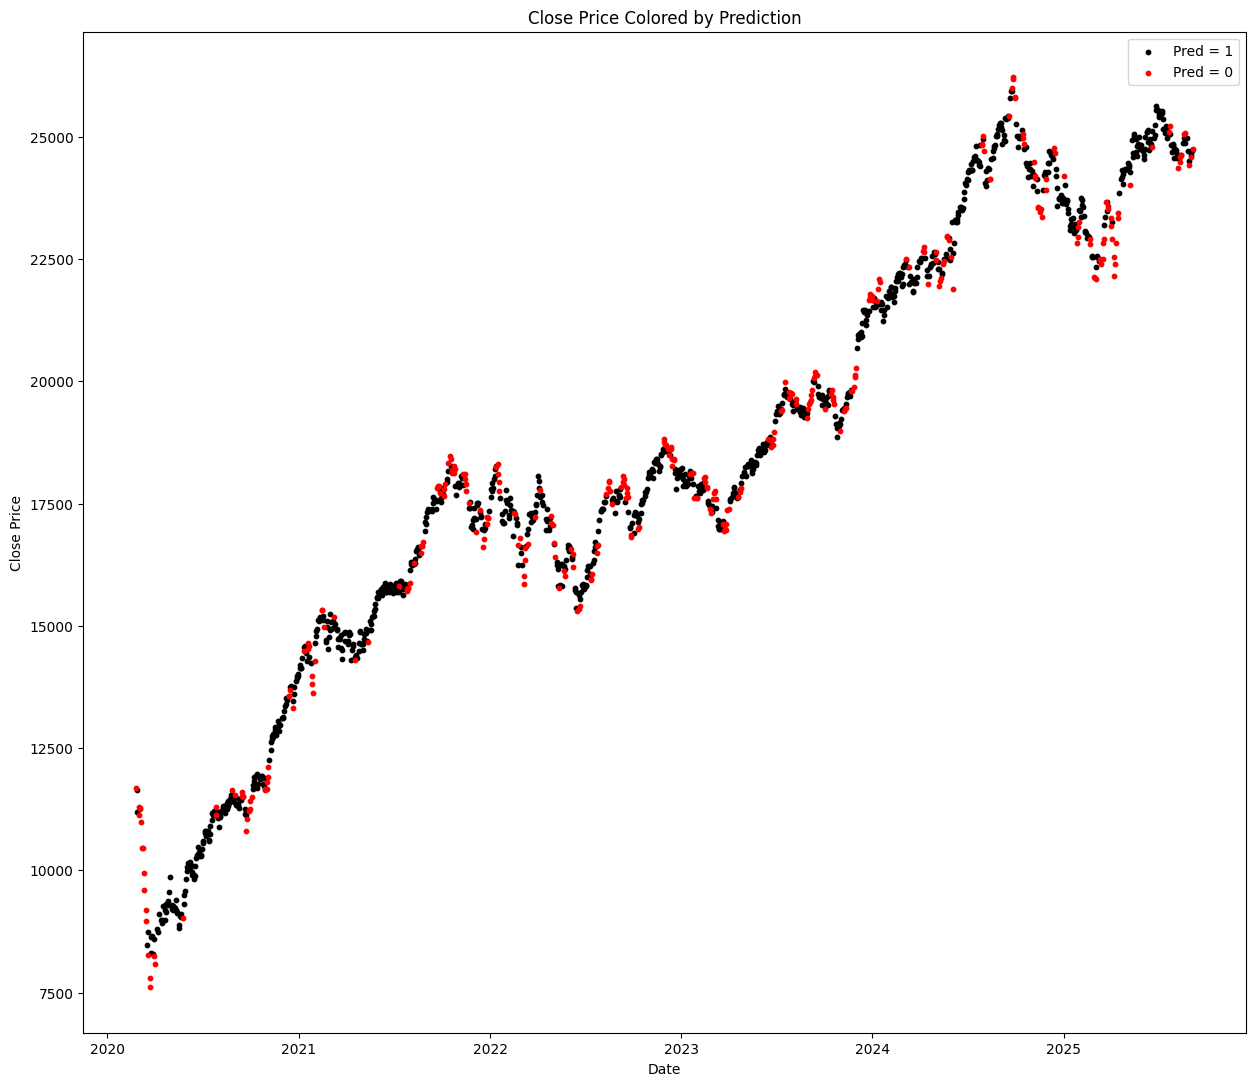

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,13))
# Plot where pred == 1 → black
plt.scatter(index_right,
            index_data.loc[index_right , "Close"],
            color='black', label='Pred = 1', s=10)

# Plot where pred == 0 → red
plt.scatter(index_wrong,
            index_data.loc[index_wrong , "Close"],
            color='red', label='Pred = 0', s=10)

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Close Price Colored by Prediction")
plt.legend()
plt.show()


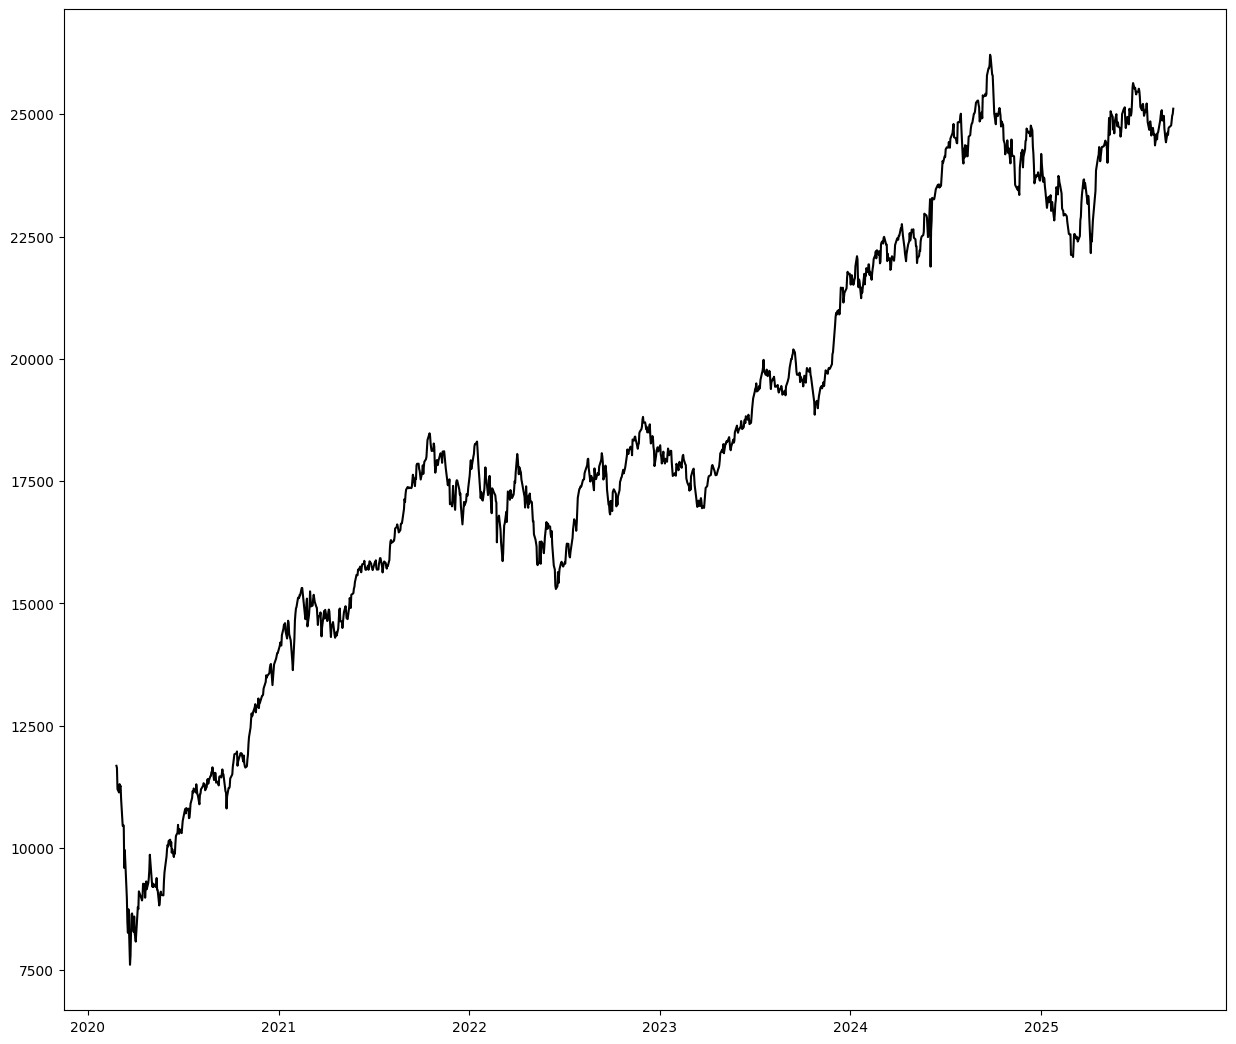

In [13]:
plt.figure(figsize=(15,13))
plt.plot(index_data["Close"] , color = "black")
plt.show()

In [14]:

# Generate date range from 2017-01-01 to today
all_thursdays = pd.date_range(start="2017-01-01", end=pd.Timestamp.today(), freq="W-THU")

# Convert to list if needed
thursday_list = all_thursdays.to_list()

print(f"Total Thursdays: {len(thursday_list)}")
print(thursday_list[:10])  # print first 10 dates
print(thursday_list[-10:]) # print last 10 dates


Total Thursdays: 454
[Timestamp('2017-01-05 00:00:00'), Timestamp('2017-01-12 00:00:00'), Timestamp('2017-01-19 00:00:00'), Timestamp('2017-01-26 00:00:00'), Timestamp('2017-02-02 00:00:00'), Timestamp('2017-02-09 00:00:00'), Timestamp('2017-02-16 00:00:00'), Timestamp('2017-02-23 00:00:00'), Timestamp('2017-03-02 00:00:00'), Timestamp('2017-03-09 00:00:00')]
[Timestamp('2025-07-10 00:00:00'), Timestamp('2025-07-17 00:00:00'), Timestamp('2025-07-24 00:00:00'), Timestamp('2025-07-31 00:00:00'), Timestamp('2025-08-07 00:00:00'), Timestamp('2025-08-14 00:00:00'), Timestamp('2025-08-21 00:00:00'), Timestamp('2025-08-28 00:00:00'), Timestamp('2025-09-04 00:00:00'), Timestamp('2025-09-11 00:00:00')]


In [15]:
thursday_list[0]

Timestamp('2017-01-05 00:00:00')